# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [6]:
# Pandas and numpy libraries
import pandas as pd 
import numpy as np

# Visualizations
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Linear regression models
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [7]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.sample(5)

,Age,Tardies
6,19,9
5,48,2
2,27,5
9,30,3
3,21,9


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot: xlabel='Age', ylabel='Tardies'>

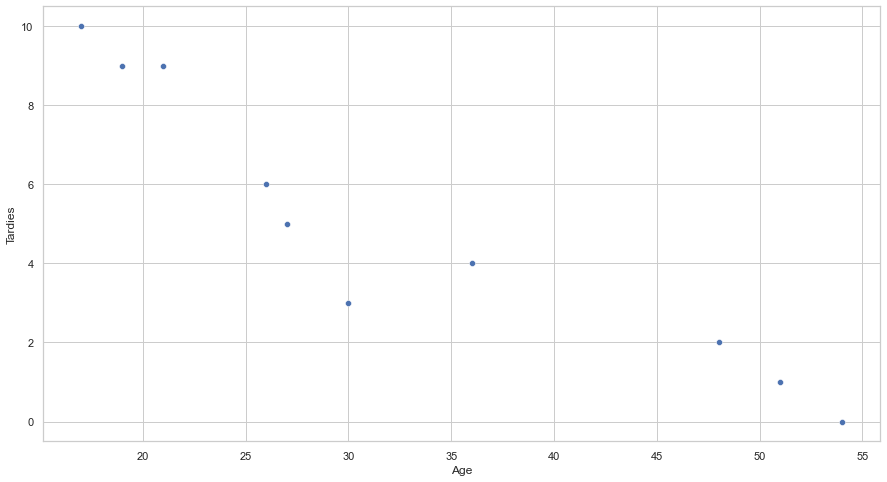

In [23]:
# Your code here.
fig = sns.scatterplot(x = student_data.Age, y = student_data.Tardies)
fig

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

# Your response here.
The scatterplot shows that there is a clear descending trend as the age group increases; the younger the student, the more probabilities of tardiness. Also, the trends seems to be linear. More on the graph, in this particular case, the intersect won't be taken into consideration for the analysis, since the minimum age to enroll in a course as this goes around 18, depending on each student's background. When it comes to the slope of the regression, it will be negative and close to 0; the magnitude is not too large.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# Your response here.
student_data.corr()
# There is a very strong negative correlation between age and tardies, meaning that tardies decrease as age increases.

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [18]:
student_data.cov()
# In probability theory and statistics, covariance is a measure of the joint variability of two random variables.
# In this case, when the greater values of one variable mainly correspond to the fewer values of the other, (that is, the 
# variables tend to show opposite behavior), the covariance is negative. 

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
# Your response here.
# For this regression model, the dependent variable are tardies while the explanatory variable is the age, since we 
# want to explain the effect of age in the number of tardies per student. Also, we use linear regression since the 
# mathematical expression that can fit the best into the observations aiming the least errors corresponds to a line.

lr = LinearRegression()
lr.fit(X = student_data[['Age']], y = student_data.Tardies)

student_data["scikitlearn"] = lr.coef_[0] * student_data.Age + lr.intercept_
student_data

,Age,Tardies,scikitlearn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

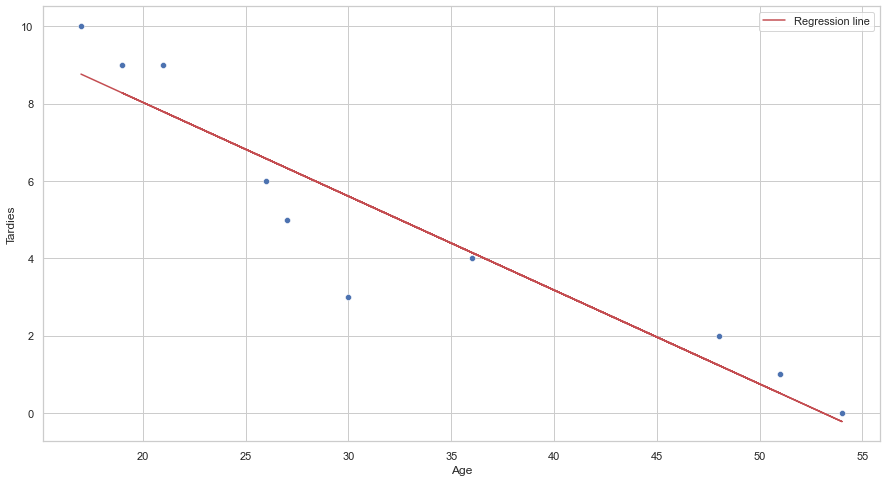

In [29]:
# Your code here.
sns.scatterplot(x = student_data.Age, y = student_data.Tardies)
plt.plot(student_data.Age, student_data.scikitlearn, label="Regression line", color="r")
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [31]:
# Your response here.
results = smf.ols("Tardies ~ Age", data=student_data).fit()
results.summary()

/Users/gerardrius/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        15:49:28   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [51]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('../lab-regression-analysis/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [52]:
# Your response here.
vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr()['CO2 Emission Grams/Mile']

CO2 Emission Grams/Mile    1.000000
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [53]:
# Having computed the correlations between our dependent variable (CO2 Emission Grams/Mile) and all explanatory variables
# (shown in the table above), the most interesting values in terms of correlation are Fuel Barrels/Year, Fuel Cost/Year 
# and Combined MPG. On the other hand, Year seems to have little effect on CO2 Emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [54]:
# Before building the model with statsmodels OLS, we rename the columns to remove spaces and slashes to avoid errors:
vehicles.rename(columns={'CO2 Emission Grams/Mile': 'CO2_Emission_Grams_Mile', 'Fuel Barrels/Year': 'Fuel_Barrels_Year', 'Combined MPG': 'Combined_MPG', 'Fuel Cost/Year': 'Fuel_Cost_Year'}, inplace=True, errors='raise')

<AxesSubplot: xlabel='Fuel_Barrels_Year', ylabel='CO2_Emission_Grams_Mile'>

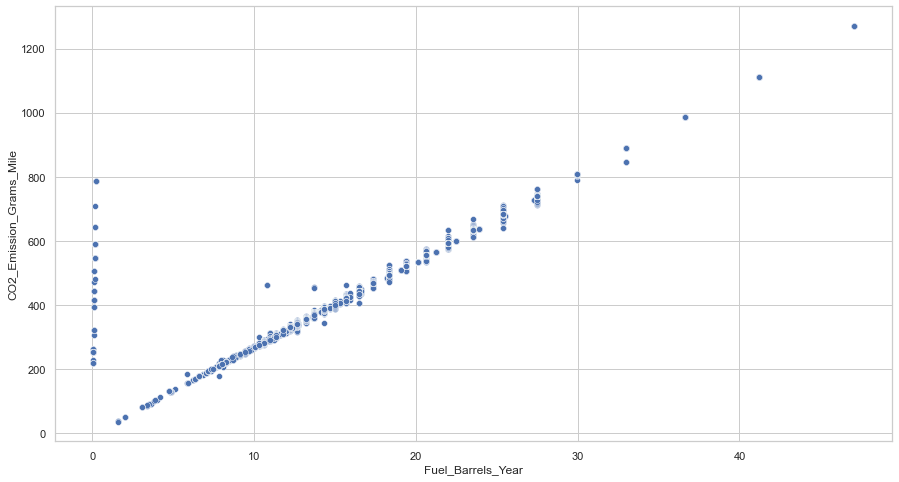

In [58]:
# First, to know what model might fit better, we plot some of the explanatory variables' relationship with the actual dependent variable.
sns.scatterplot(y=vehicles.CO2_Emission_Grams_Mile, x=vehicles['Fuel_Barrels_Year'], data=vehicles)

<AxesSubplot: xlabel='Combined_MPG', ylabel='CO2_Emission_Grams_Mile'>

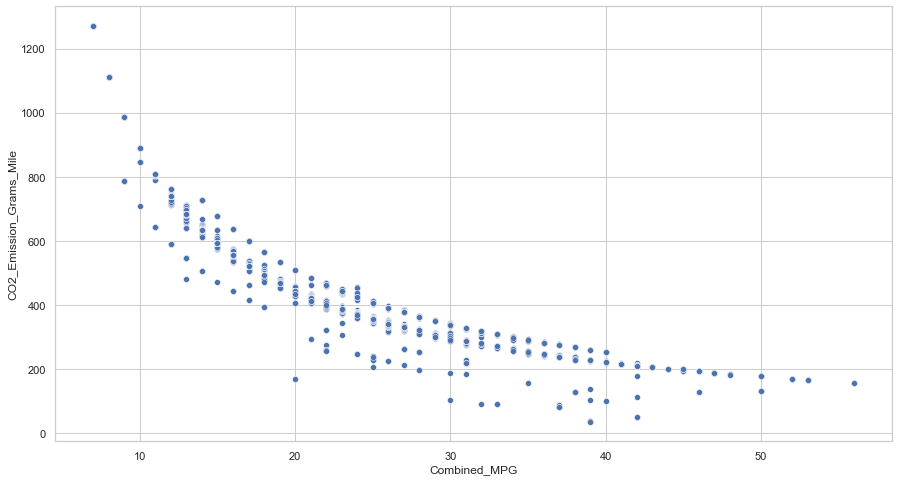

In [59]:
sns.scatterplot(y=vehicles.CO2_Emission_Grams_Mile, x=vehicles['Combined_MPG'], data=vehicles)
# In this case, we observe an exponential relationship.

<AxesSubplot: xlabel='Fuel_Cost_Year', ylabel='CO2_Emission_Grams_Mile'>

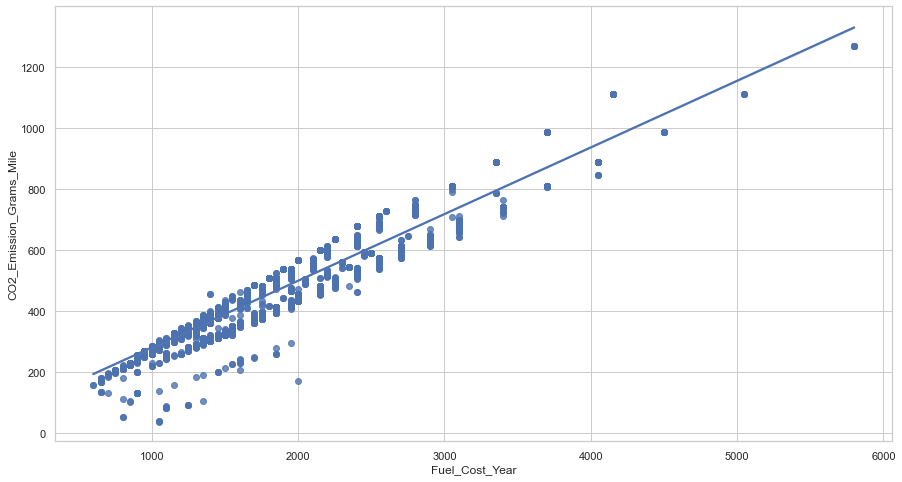

In [63]:
sns.regplot(y=vehicles.CO2_Emission_Grams_Mile, x=vehicles['Fuel_Cost_Year'], data=vehicles)
# In Fuel Cost/Year, the relationship is linear.

In [64]:
# Your response here. 
vehicles_model = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=vehicles).fit()

In [61]:
# We used a multilinear regression since most of the explanatory variables are linear.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [65]:
# Your response here. 
vehicles_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                             17:12:32   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [69]:
# Your code here.
df = pd.DataFrame({'Invitations': [1,3,4,6,8,9,11,14], 'Attendees':[1,2,4,4,5,7,8,13]})
df

,Invitations,Attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot: xlabel='Invitations', ylabel='Attendees'>

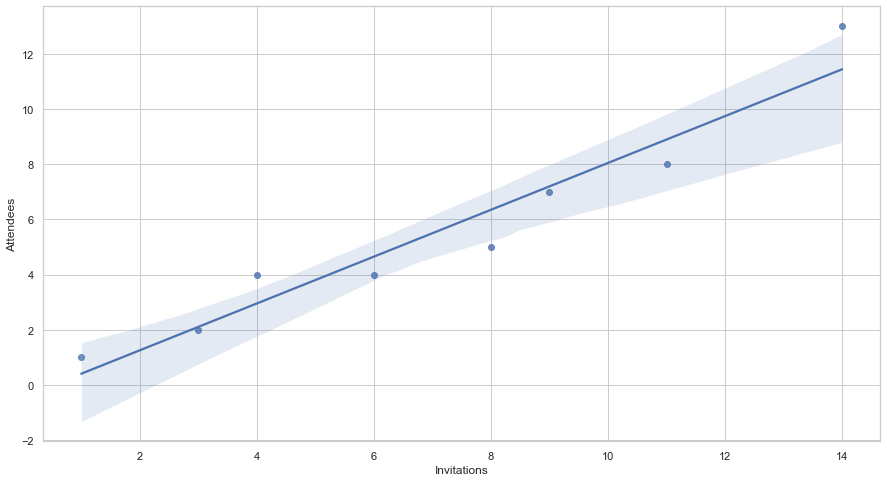

In [71]:
# Your code here.
sns.regplot(x = df.Invitations, y=df.Attendees)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [72]:
# Your response here.
# What we can observe in this graph is that there is a positive correlation between the number of invitations and the number
# of attendees. The actual slope of the regression line is the ratio of attendees per invitations. Since it is linear, it means that the 
# ratio is constant and thus the hypothesis should be rejected.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<AxesSubplot: xlabel='Invitations', ylabel='Attendees'>

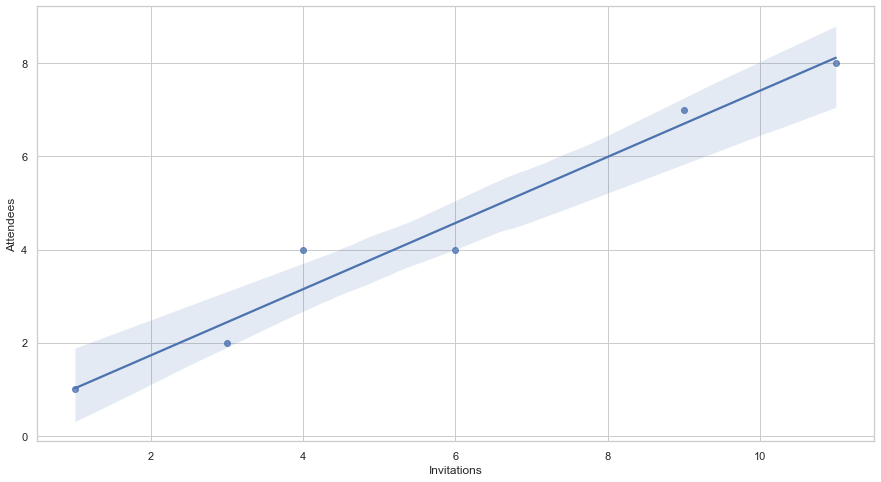

In [94]:
# Your response here. 
# There are two points which fall outside of the 95% confidence interval, corresponding to the parties with 8 and 14
# invitations respectively.

df = df.drop(df[df.Invitations == 8].index)
df = df.drop(df[df.Invitations == 14].index)
sns.regplot(x = df.Invitations, y=df.Attendees)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# We dropped both columns in which the events fell outside of the confidence interval. However, the trend does not vary much; it still shows a positive correlation
# (about 3 of every 4 invitions are corresponded). In my opinion, the sample size is to small to make strong statements,
# even if there is evidence to reject the initial hypothesis.